In [3]:
pip install pandas

  Using cached pandas-2.2.3-cp313-cp313-win_amd64.whl.metadata (19 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.2.3-cp313-cp313-win_amd64.whl (11.5 MB)
   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   - -------------------------------------- 0.5/12.6 MB 3.5 MB/s eta 0:00:04
   --- ------------------------------------ 1.0/12.6 MB 3.2 MB/s eta 0:00:04
   ---- ----------------------------------- 1.3/12.6 MB 2.4 MB/s eta 0:00:05
   ----- ---------------------------------- 1.8/12.6 MB 2.3 MB/s eta 0:00:05
   ----- ---------------------------------- 1.8/12.6 MB 2.3 MB/s eta 0:00:05
   ------- -------------------------------- 2.4/12.6 MB 2.0 MB/s eta 0:00:06
   --------- ------------------------------ 2.9/12.6 MB 2.2 MB/s eta 0:00:05
   --------- ------------------------------ 2.9/12.6 MB 2.2 MB/s eta 0:00:05
   ----------- ---------------------------- 3.7/

In [35]:
pip install matplotlib

  Using cached matplotlib-3.10.1-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.1-cp313-cp313-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.8-cp313-cp313-win_amd64.whl.metadata (6.3 kB)
  Using cached pillow-11.1.0-cp313-cp313-win_amd64.whl.metadata (9.3 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.1-cp313-cp313-win_amd64.whl (8.1 MB)
Using cached contourpy-1.3.1-cp313-cp313-win_amd64.whl (220 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   --------- ------------------------------ 0.5/2.2 MB 5.0 MB/s eta 0:00:01
   ------------------- -------------------- 1.0/2.2 MB 2.0 MB/s eta 0:00:01
   ----------------------- ---------------- 1.3/2.2 MB 2.0 MB/s eta 0:00:01
   ---------------------------- ----------- 1.6/2.2 MB 1.9 MB/s eta 0:00:01
   -----------

In [37]:
pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


In [33]:
# Step 1: Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split  # Ensure this is included
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [34]:
data = pd.read_csv('data/earthquake_data.csv')
print(data.head())
print(data.shape)

   BRNCH_NO  MSTN_TYPE_KND PRSNTN_TM  REF_NO          INPT_TM  NTFCTN_LVL  \
0       108              1   52:00.0      84   9/3/2010 12:52           1   
1       108              1   55:00.0     116   4/4/2010 12:55           1   
2       108              1   21:00.0     138   12/4/2010 1:21           1   
3       108              1   18:00.0     141   13/4/2010 2:18           1   
4       108              1   05:00.0     145  16/4/2010 20:05           1   

            HUR    LAT     LOT                       PSTN  SCL  \
0  2.010030e+13  36.42  125.75  충남 태안군 서격렬비열도 남동쪽 28km 해역  3.2   
1  2.010040e+13  38.51  126.06        황해북도 사리원 동쪽 26km 지역  2.3   
2  2.010040e+13  34.12  125.66    전남 신안군 흑산면 남남동쪽 61km 해역  2.2   
3  2.010040e+13  34.02  125.44      전남 신안군 흑산면 남쪽 70km 해역  2.5   
4  2.010040e+13  38.72  125.97         황해북도 송림 동쪽 29km 지역  2.3   

                                            REF_MTTR MDFCN_MTTR  \
0  이 지진정보는 자동계기분석 결과이며, 상세분석 후 변경될 수 있음.\r\n신고된 피...        NaN   
1    이

In [35]:
print(data.dtypes)

BRNCH_NO                int64
MSTN_TYPE_KND           int64
PRSNTN_TM              object
REF_NO                  int64
INPT_TM                object
NTFCTN_LVL              int64
HUR                   float64
LAT                   float64
LOT                   float64
PSTN                   object
SCL                   float64
REF_MTTR               object
MDFCN_MTTR             object
MAAS_OBNT_DT           object
CRT_SN                  int64
OCRN_DPTH             float64
DTL_INFO_URI          float64
ERQK_NO               float64
INTENSITY_DST_CODE    float64
dtype: object


In [36]:
features = data[['LAT', 'LOT', 'SCL']]  # Adjust based on your dataset
target = data['SCL']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [37]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [44]:
data['Predicted Magnitude'] = model.predict(features)
predicted_data = data[['LAT', 'LOT', 'Predicted Magnitude']]

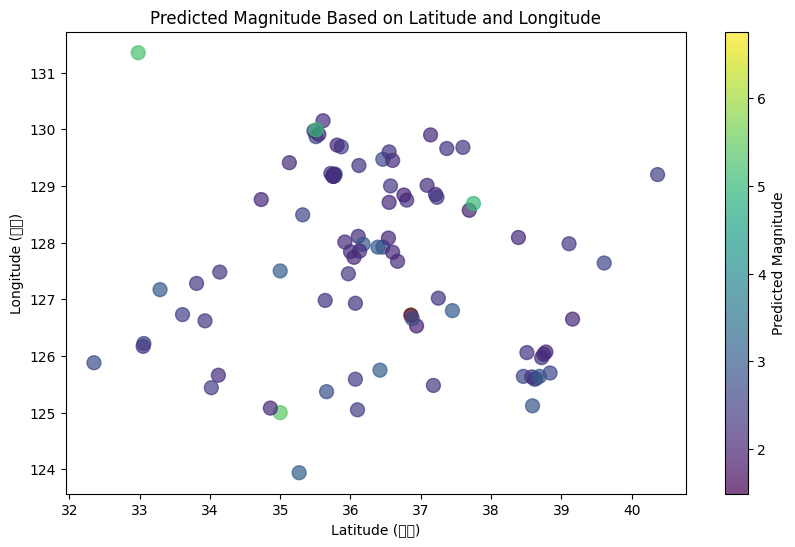

In [47]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(predicted_data['LAT'], predicted_data['LOT'], 
                      c=predicted_data['Predicted Magnitude'], 
                      cmap='viridis',  # Color map for magnitude
                      s=100,  # Size of the points
                      alpha=0.7)

# Step 11: Add color bar
plt.colorbar(scatter, label='Predicted Magnitude')

# Step 12: Add labels and title
plt.xlabel('Latitude (위도)')
plt.ylabel('Longitude (경도)')
plt.title('Predicted Magnitude Based on Latitude and Longitude')

# Step 13: Show the plot
plt.show()

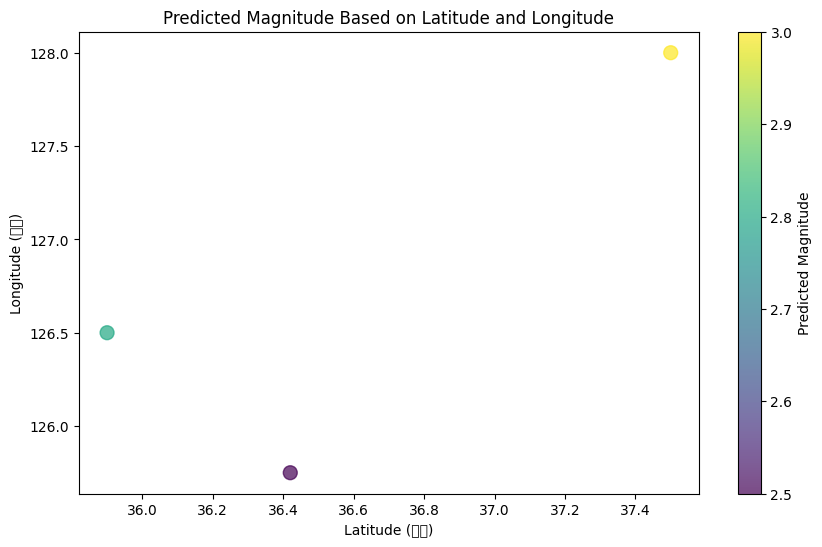

In [48]:
# Example DataFrame with latitude, longitude, and predicted magnitudes
predicted_data = pd.DataFrame({
    '위도': [36.42, 37.5, 35.9],  # Example latitudes
    '경도': [125.75, 128.0, 126.5],  # Example longitudes
    'Predicted Magnitude': [2.5, 3.0, 2.8]  # Example predicted magnitudes
})

# Step 1: Create a scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(predicted_data['위도'], predicted_data['경도'], 
                      c=predicted_data['Predicted Magnitude'], 
                      cmap='viridis',  # Color map for magnitude
                      s=100,  # Size of the points
                      alpha=0.7)

# Step 2: Add color bar
plt.colorbar(scatter, label='Predicted Magnitude')

# Step 3: Add labels and title
plt.xlabel('Latitude (위도)')
plt.ylabel('Longitude (경도)')
plt.title('Predicted Magnitude Based on Latitude and Longitude')

# Step 4: Show the plot
plt.show()

In [50]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("data/disaster.csv")

# Inspect the first few rows
print(df.head())


       SN               CRT_DT  \
0    일련번호                 생성일시   
1  205163  2023/09/16 11:09:49   
2  205164  2023/09/16 11:11:56   
3  205165  2023/09/16 11:12:53   
4  205166  2023/09/16 11:14:58   

                                              MSG_CN RCPTN_RGN_NM  \
0                                              메시지내용        수신지역명   
1  [행정안전부] 오늘 11시10분 부산 호우경보, 산사태ㆍ상습침수 등 위험지역 대피,...    부산광역시 전체    
2  [울주군]오늘부터 내일까지 많은 비가 예상되고 있습니다. 하천변 산책로, 계곡, 저...   울산광역시 울주군    
3  [부산광역시] 오늘 11시 10분 부산지역 호우경보. 저지대, 침수 우려지역 등 위...    부산광역시 전체    
4  [진도군]10:50 호우주의보 발효. 내일까지 많은 비가 예상되니 외출자제 및 위험...    전라남도 진도군    

  EMRG_STEP_NM DST_SE_NM     REG_YMD   MDFCN_YMD  
0        긴급단계명     재해구분명        등록일자        수정일자  
1         안전안내        호우  2023-09-16  2023-09-16  
2         안전안내        호우  2023-09-16  2023-09-16  
3         안전안내        호우  2023-09-16  2023-09-16  
4         안전안내        호우  2023-09-16  2023-09-16  


In [51]:
# Get column names and basic info about the dataset
print(df.columns)

# Check data types and null values
print(df.info())

# Get summary statistics for numerical columns
print(df.describe())


Index(['SN', 'CRT_DT', 'MSG_CN', 'RCPTN_RGN_NM', 'EMRG_STEP_NM', 'DST_SE_NM',
       'REG_YMD', 'MDFCN_YMD'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   SN            101 non-null    object
 1   CRT_DT        101 non-null    object
 2   MSG_CN        101 non-null    object
 3   RCPTN_RGN_NM  101 non-null    object
 4   EMRG_STEP_NM  101 non-null    object
 5   DST_SE_NM     101 non-null    object
 6   REG_YMD       101 non-null    object
 7   MDFCN_YMD     101 non-null    object
dtypes: object(8)
memory usage: 6.4+ KB
None
          SN CRT_DT MSG_CN RCPTN_RGN_NM EMRG_STEP_NM DST_SE_NM     REG_YMD  \
count    101    101    101          101          101       101         101   
unique   101    101    101           67            3         7           3   
top     일련번호   생성일시  메시지내용    부산광역시 북구          안전안내        호우  2

In [52]:
# Check for missing values
print(df.isnull().sum())

# Fill or drop missing values if needed
df = df.fillna(0)  # Example: fill NaN with 0


SN              0
CRT_DT          0
MSG_CN          0
RCPTN_RGN_NM    0
EMRG_STEP_NM    0
DST_SE_NM       0
REG_YMD         0
MDFCN_YMD       0
dtype: int64


In [54]:
# Parse 'CRT_DT' with time
df['CRT_DT'] = pd.to_datetime(df['CRT_DT'], dayfirst=True, errors='coerce')

# Parse 'REG_YMD' and 'MDFCN_YMD' (date only)
df['REG_YMD'] = pd.to_datetime(df['REG_YMD'], dayfirst=True, errors='coerce')
df['MDFCN_YMD'] = pd.to_datetime(df['MDFCN_YMD'], dayfirst=True, errors='coerce')


C:\Users\nurul\AppData\Local\Temp\ipykernel_25688\491941757.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['CRT_DT'] = pd.to_datetime(df['CRT_DT'], dayfirst=True, errors='coerce')
C:\Users\nurul\AppData\Local\Temp\ipykernel_25688\491941757.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['REG_YMD'] = pd.to_datetime(df['REG_YMD'], dayfirst=True, errors='coerce')
C:\Users\nurul\AppData\Local\Temp\ipykernel_25688\491941757.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['MDFCN_YMD'] = pd.to_datetime(df['MDFCN_YMD'], dayfirst=True, errors='coerce')


In [55]:
print(df[['CRT_DT', 'REG_YMD', 'MDFCN_YMD']].head())


               CRT_DT    REG_YMD  MDFCN_YMD
0                 NaT        NaT        NaT
1 2023-09-16 11:09:49 2023-09-16 2023-09-16
2 2023-09-16 11:11:56 2023-09-16 2023-09-16
3 2023-09-16 11:12:53 2023-09-16 2023-09-16
4 2023-09-16 11:14:58 2023-09-16 2023-09-16


In [56]:
# Count occurrences of each emergency step
print(df['EMRG_STEP_NM'].value_counts())

EMRG_STEP_NM
안전안내     99
긴급단계명     1
긴급재난      1
Name: count, dtype: int64


In [57]:
# Count occurrences by region
print(df['RCPTN_RGN_NM'].value_counts())


RCPTN_RGN_NM
부산광역시 북구                                                                               5
부산광역시 금정구                                                                              4
부산광역시 동구                                                                               4
부산광역시 수영구                                                                              3
부산광역시 기장군                                                                              3
                                                                                      ..
경상남도 고성군 ,경상남도 진주시                                                                     1
경상남도 하동군                                                                               1
경상남도 통영시 ,경상남도 창원시 의창구 ,경상남도 창원시 성산구 ,경상남도 창원시 마산합포구 ,경상남도 창원시 마산회원구 ,경상남도 창원시 진해구     1
경상남도 고성군                                                                               1
인천광역시 남동구                                                                              1
Name: co

d:\EmergencyApp\venv\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1567: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


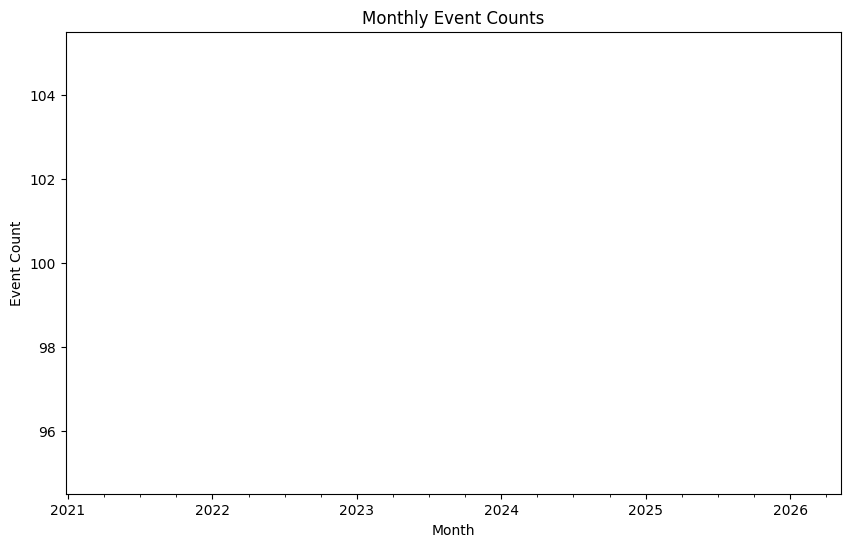

In [58]:
# Create a 'month' column
df['month'] = df['CRT_DT'].dt.to_period('M')

# Group by month and count events
monthly_counts = df.groupby('month').size()

# Plot the result
import matplotlib.pyplot as plt
monthly_counts.plot(kind='line', figsize=(10, 6))
plt.title("Monthly Event Counts")
plt.ylabel("Event Count")
plt.xlabel("Month")
plt.show()


d:\EmergencyApp\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50504 (\N{HANGUL SYLLABLE AN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\EmergencyApp\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\EmergencyApp\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 45236 (\N{HANGUL SYLLABLE NAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\EmergencyApp\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44596 (\N{HANGUL SYLLABLE GIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\EmergencyApp\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44553 (\N{HANGUL SYLLABLE GEUB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\Emerge

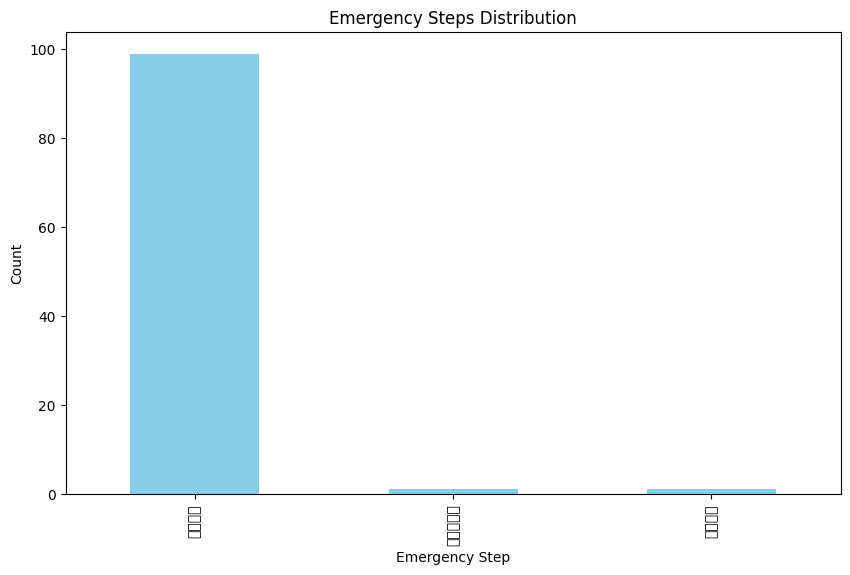

In [59]:
df['EMRG_STEP_NM'].value_counts().plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Emergency Steps Distribution')
plt.ylabel('Count')
plt.xlabel('Emergency Step')
plt.show()


In [61]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


<Axes: title={'center': 'Disaster Alerts by Type'}, xlabel='DST_SE_NM'>

d:\EmergencyApp\venv\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 54840 (\N{HANGUL SYLLABLE HO}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
d:\EmergencyApp\venv\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 50864 (\N{HANGUL SYLLABLE U}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
d:\EmergencyApp\venv\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
d:\EmergencyApp\venv\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 53440 (\N{HANGUL SYLLABLE TA}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
d:\EmergencyApp\venv\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 49328 (\N{HANGUL SYLLABLE SAN}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
d:\EmergencyApp\venv\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from f

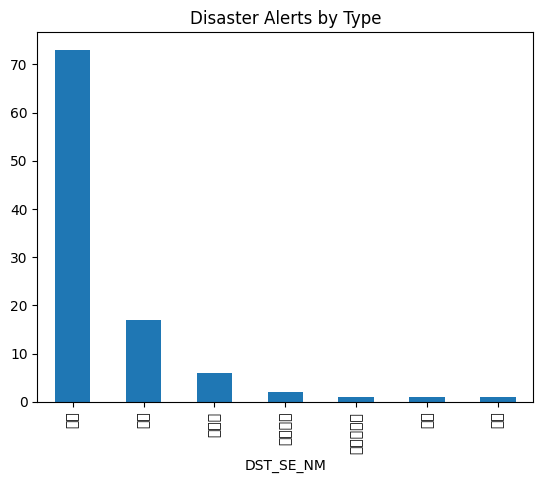

In [63]:
df['DST_SE_NM'].value_counts().plot(kind='bar', title='Disaster Alerts by Type')


In [64]:
# Rename columns
df.rename(columns={
    'SN': 'serial_no',
    'CRT_DT': 'created_at',
    'MSG_CN': 'message',
    'RCPTN_RGN_NM': 'region',
    'EMRG_STEP_NM': 'emergency_stage',
    'DST_SE_NM': 'disaster_type',
    'REG_YMD': 'registered_date',
    'MDFCN_YMD': 'modified_date'
}, inplace=True)


In [69]:
df.head()


,serial_no,created_at,message,region,emergency_stage,disaster_type,registered_date,modified_date
1,205163,2023-09-16 11:09:49,"[행정안전부] 오늘 11시10분 부산 호우경보, 산사태ㆍ상습침수 등 위험지역 대피,...",부산광역시 전체,안전안내,호우,2023-09-16,2023-09-16
2,205164,2023-09-16 11:11:56,"[울주군]오늘부터 내일까지 많은 비가 예상되고 있습니다. 하천변 산책로, 계곡, 저...",울산광역시 울주군,안전안내,호우,2023-09-16,2023-09-16
3,205165,2023-09-16 11:12:53,"[부산광역시] 오늘 11시 10분 부산지역 호우경보. 저지대, 침수 우려지역 등 위...",부산광역시 전체,안전안내,호우,2023-09-16,2023-09-16
4,205166,2023-09-16 11:14:58,[진도군]10:50 호우주의보 발효. 내일까지 많은 비가 예상되니 외출자제 및 위험...,전라남도 진도군,안전안내,호우,2023-09-16,2023-09-16
5,205167,2023-09-16 11:22:36,"[경상남도] 남해고속도로 진성IC 인근 부산방향의 화물차 사고로, 양방향 극심한 정...",경상남도 전체,안전안내,교통통제,2023-09-16,2023-09-16


In [68]:
import pandas as pd

# Load your file
df = pd.read_csv("data/disaster.csv", encoding='utf-8')

# Rename columns
df.rename(columns={
    'SN': 'serial_no',
    'CRT_DT': 'created_at',
    'MSG_CN': 'message',
    'RCPTN_RGN_NM': 'region',
    'EMRG_STEP_NM': 'emergency_stage',
    'DST_SE_NM': 'disaster_type',
    'REG_YMD': 'registered_date',
    'MDFCN_YMD': 'modified_date'
}, inplace=True)

# Convert dates to datetime
df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')
df['registered_date'] = pd.to_datetime(df['registered_date'], errors='coerce')
df['modified_date'] = pd.to_datetime(df['modified_date'], errors='coerce')

# Drop rows with invalid dates
df = df.dropna(subset=['created_at'])


C:\Users\nurul\AppData\Local\Temp\ipykernel_25688\1472095267.py:19: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')
C:\Users\nurul\AppData\Local\Temp\ipykernel_25688\1472095267.py:20: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['registered_date'] = pd.to_datetime(df['registered_date'], errors='coerce')
C:\Users\nurul\AppData\Local\Temp\ipykernel_25688\1472095267.py:21: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['modified_date'] = pd.to_datetime(df['modified_date'], errors='coerce')


In [70]:
# Remove whitespace and normalize region names
df['region'] = df['region'].str.strip()

# Check for top disaster types and regions
print(df['disaster_type'].value_counts())
print(df['region'].value_counts())


disaster_type
호우      73
기타      17
산사태      6
교통통제     2
한파       1
태풍       1
Name: count, dtype: int64
region
부산광역시 북구                                                                              5
부산광역시 금정구                                                                             4
부산광역시 동구                                                                              4
부산광역시 전체                                                                              3
부산광역시 수영구                                                                             3
                                                                                     ..
경상남도 고성군 ,경상남도 진주시                                                                    1
경상남도 하동군                                                                              1
경상남도 통영시 ,경상남도 창원시 의창구 ,경상남도 창원시 성산구 ,경상남도 창원시 마산합포구 ,경상남도 창원시 마산회원구 ,경상남도 창원시 진해구    1
경상남도 고성군                                                                              1
인천광역시 남

d:\EmergencyApp\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54840 (\N{HANGUL SYLLABLE HO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\EmergencyApp\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50864 (\N{HANGUL SYLLABLE U}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\EmergencyApp\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\EmergencyApp\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 53440 (\N{HANGUL SYLLABLE TA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\EmergencyApp\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49328 (\N{HANGUL SYLLABLE SAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\EmergencyApp

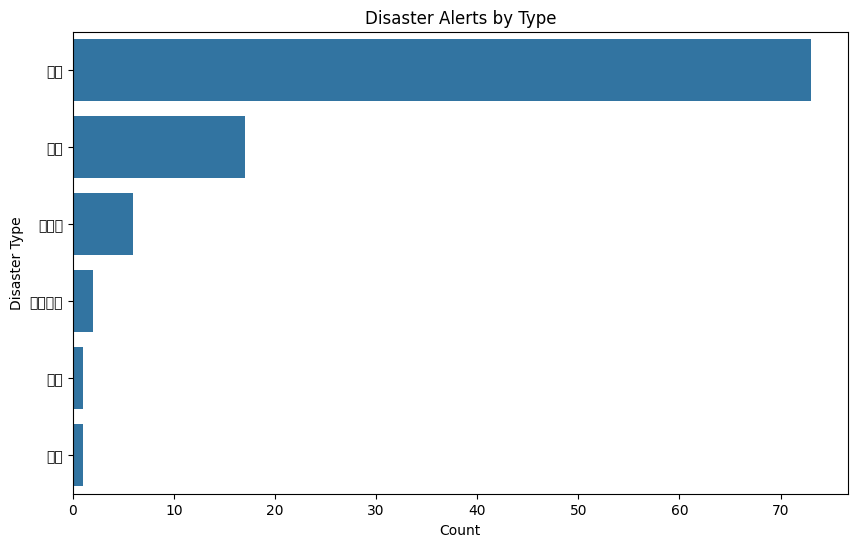

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='disaster_type', order=df['disaster_type'].value_counts().index)
plt.title("Disaster Alerts by Type")
plt.xlabel("Count")
plt.ylabel("Disaster Type")
plt.show()


d:\EmergencyApp\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\EmergencyApp\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49328 (\N{HANGUL SYLLABLE SAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\EmergencyApp\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44305 (\N{HANGUL SYLLABLE GWANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\EmergencyApp\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50669 (\N{HANGUL SYLLABLE YEOG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\EmergencyApp\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\Emerge

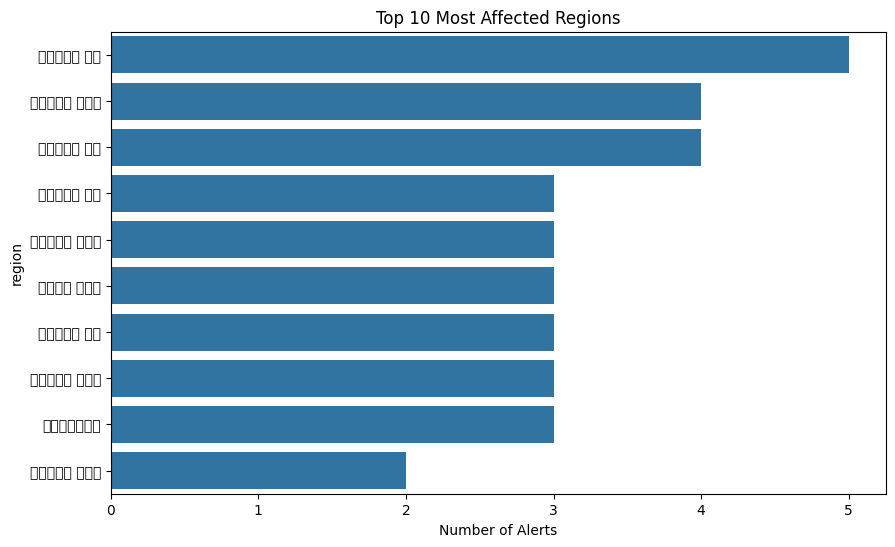

In [72]:
plt.figure(figsize=(10, 6))
top_regions = df['region'].value_counts().head(10)
sns.barplot(x=top_regions.values, y=top_regions.index)
plt.title("Top 10 Most Affected Regions")
plt.xlabel("Number of Alerts")
plt.show()


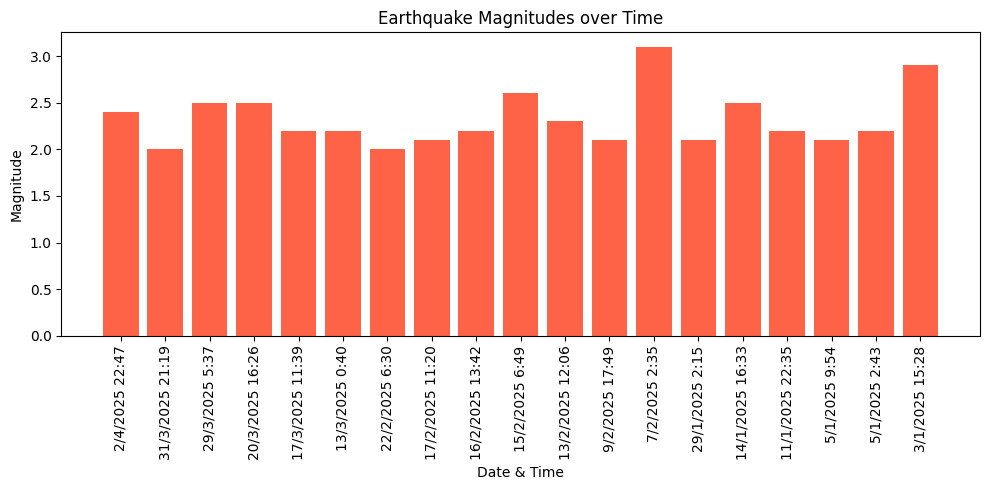

In [76]:
# 📌 Step 1: Import Libraries
import pandas as pd
import folium
import matplotlib.pyplot as plt
from folium.plugins import MarkerCluster

# 📌 Step 2: Create DataFrame manually
df = pd.read_csv("data/KoreaEarthquakeList.xls", encoding='utf-8')

columns = ["No", "DateTime", "Magnitude", "Depth_km", "Max_Intensity", "Latitude", "Longitude"]
df = pd.DataFrame(data, columns=columns)

# 📌 Step 3: Preprocess Coordinates
def parse_lat(lat):
    return float(lat.replace(" N", ""))

def parse_lon(lon):
    return float(lon.replace(" E", ""))

df['Latitude'] = df['Latitude'].apply(parse_lat)
df['Longitude'] = df['Longitude'].apply(parse_lon)

# 📌 Step 4: Plot Basic Stats
plt.figure(figsize=(10, 5))
plt.bar(df['DateTime'], df['Magnitude'], color='tomato')
plt.xticks(rotation=90)
plt.title("Earthquake Magnitudes over Time")
plt.ylabel("Magnitude")
plt.xlabel("Date & Time")
plt.tight_layout()
plt.show()

# 📌 Step 5: Interactive Map with Markers
m = folium.Map(location=[36.5, 127.5], zoom_start=6)
marker_cluster = MarkerCluster().add_to(m)

for idx, row in df.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=(f"<b>Date:</b> {row['DateTime']}<br>"
               f"<b>Magnitude:</b> {row['Magnitude']}<br>"
               f"<b>Depth:</b> {row['Depth_km']} km<br>"
               f"<b>Intensity:</b> {row['Max_Intensity']}")
    ).add_to(marker_cluster)

m.save("earthquake_map.html")


In [ ]:
# 📌 Step 1: Import Libraries
import pandas as pd
import folium
import matplotlib.pyplot as plt
from folium.plugins import MarkerCluster

# 📌 Step 2: Create DataFrame manually
data = [
    [19, "2/4/2025 22:47", 2.4, 8, "Ⅰ", "35.56 N", "124.43 E"],
    [18, "31/3/2025 21:19", 2.0, 12, "Ⅰ", "41.36 N", "129.43 E"],
    [17, "29/3/2025 5:37", 2.5, 20, "Ⅱ", "33.90 N", "126.93 E"],
    [16, "20/3/2025 16:26", 2.5, 15, "Ⅰ", "36.49 N", "124.68 E"],
    [15, "17/3/2025 11:39", 2.2, 12, "Ⅰ", "38.67 N", "125.62 E"],
    [14, "13/3/2025 0:40", 2.2, 22, "Ⅰ", "35.62 N", "129.96 E"],
    [13, "22/2/2025 6:30", 2.0, 8, "Ⅰ", "36.71 N", "125.93 E"],
    [12, "17/2/2025 11:20", 2.1, 21, "Ⅰ", "33.91 N", "126.93 E"],
    [11, "16/2/2025 13:42", 2.2, 20, "Ⅱ", "33.91 N", "126.94 E"],
    [10, "15/2/2025 6:49", 2.6, 5, "Ⅲ", "37.28 N", "129.33 E"],
    [9, "13/2/2025 12:06", 2.3, 8, "Ⅱ", "35.70 N", "126.73 E"],
    [8, "9/2/2025 17:49", 2.1, None, "Ⅰ", "38.49 N", "126.15 E"],
    [7, "7/2/2025 2:35", 3.1, 9, "Ⅴ", "37.14 N", "127.76 E"],
    [6, "29/1/2025 2:15", 2.1, 11, "Ⅰ", "38.47 N", "126.19 E"],
    [5, "14/1/2025 16:33", 2.5, 10, "Ⅰ", "39.01 N", "126.53 E"],
    [4, "11/1/2025 22:35", 2.2, 13, "Ⅰ", "33.49 N", "125.85 E"],
    [3, "5/1/2025 9:54", 2.1, 10, "Ⅱ", "35.48 N", "128.31 E"],
    [2, "5/1/2025 2:43", 2.2, 5, "Ⅰ", "38.00 N", "125.39 E"],
    [1, "3/1/2025 15:28", 2.9, 8, "Ⅴ", "35.56 N", "127.94 E"]
]

columns = ["No", "DateTime", "Magnitude", "Depth_km", "Max_Intensity", "Latitude", "Longitude"]
df = pd.DataFrame(data, columns=columns)

# 📌 Step 3: Preprocess Coordinates
def parse_lat(lat):
    return float(lat.replace(" N", ""))

def parse_lon(lon):
    return float(lon.replace(" E", ""))

df['Latitude'] = df['Latitude'].apply(parse_lat)
df['Longitude'] = df['Longitude'].apply(parse_lon)

# 📌 Step 4: Plot Basic Stats
plt.figure(figsize=(10, 5))
plt.bar(df['DateTime'], df['Magnitude'], color='tomato')
plt.xticks(rotation=90)
plt.title("Earthquake Magnitudes over Time")
plt.ylabel("Magnitude")
plt.xlabel("Date & Time")
plt.tight_layout()
plt.show()

# 📌 Step 5: Interactive Map with Markers
m = folium.Map(location=[36.5, 127.5], zoom_start=6)
marker_cluster = MarkerCluster().add_to(m)

for idx, row in df.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=(f"<b>Date:</b> {row['DateTime']}<br>"
               f"<b>Magnitude:</b> {row['Magnitude']}<br>"
               f"<b>Depth:</b> {row['Depth_km']} km<br>"
               f"<b>Intensity:</b> {row['Max_Intensity']}")
    ).add_to(marker_cluster)

m.save("earthquake_map.html")


In [ ]:
const earthquakeData = [
  { lat: 35.56, lon: 124.43, datetime: "2/4/2025 22:47", magnitude: 2.4, depth: 8, intensity: "Ⅰ" },
  { lat: 41.36, lon: 129.43, datetime: "31/3/2025 21:19", magnitude: 2.0, depth: 12, intensity: "Ⅰ" },
  { lat: 33.90, lon: 126.93, datetime: "29/3/2025 5:37", magnitude: 2.5, depth: 20, intensity: "Ⅱ" },
  { lat: 36.49, lon: 124.68, datetime: "20/3/2025 16:26", magnitude: 2.5, depth: 15, intensity: "Ⅰ" },
  { lat: 38.67, lon: 125.62, datetime: "17/3/2025 11:39", magnitude: 2.2, depth: 12, intensity: "Ⅰ" },
  { lat: 35.62, lon: 129.96, datetime: "13/3/2025 0:40", magnitude: 2.2, depth: 22, intensity: "Ⅰ" },
  { lat: 36.71, lon: 125.93, datetime: "22/2/2025 6:30", magnitude: 2.0, depth: 8, intensity: "Ⅰ" },
  { lat: 33.91, lon: 126.93, datetime: "17/2/2025 11:20", magnitude: 2.1, depth: 21, intensity: "Ⅰ" },
  { lat: 33.91, lon: 126.94, datetime: "16/2/2025 13:42", magnitude: 2.2, depth: 20, intensity: "Ⅱ" },
  { lat: 37.28, lon: 129.33, datetime: "15/2/2025 6:49", magnitude: 2.6, depth: 5, intensity: "Ⅲ" },
  { lat: 35.70, lon: 126.73, datetime: "13/2/2025 12:06", magnitude: 2.3, depth: 8, intensity: "Ⅱ" },
  { lat: 38.49, lon: 126.15, datetime: "9/2/2025 17:49", magnitude: 2.1, depth: null, intensity: "Ⅰ" },
  { lat: 37.14, lon: 127.76, datetime: "7/2/2025 2:35", magnitude: 3.1, depth: 9, intensity: "Ⅴ" },
  { lat: 38.47, lon: 126.19, datetime: "29/1/2025 2:15", magnitude: 2.1, depth: 11, intensity: "Ⅰ" },
  { lat: 39.01, lon: 126.53, datetime: "14/1/2025 16:33", magnitude: 2.5, depth: 10, intensity: "Ⅰ" },
  { lat: 33.49, lon: 125.85, datetime: "11/1/2025 22:35", magnitude: 2.2, depth: 13, intensity: "Ⅰ" },
  { lat: 35.48, lon: 128.31, datetime: "5/1/2025 9:54", magnitude: 2.1, depth: 10, intensity: "Ⅱ" },
  { lat: 38.00, lon: 125.39, datetime: "5/1/2025 2:43", magnitude: 2.2, depth: 5, intensity: "Ⅰ" },
  { lat: 35.56, lon: 127.94, datetime: "3/1/2025 15:28", magnitude: 2.9, depth: 8, intensity: "Ⅴ" }
];
